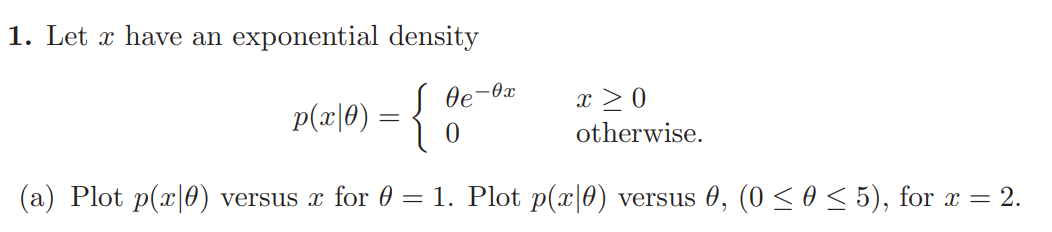

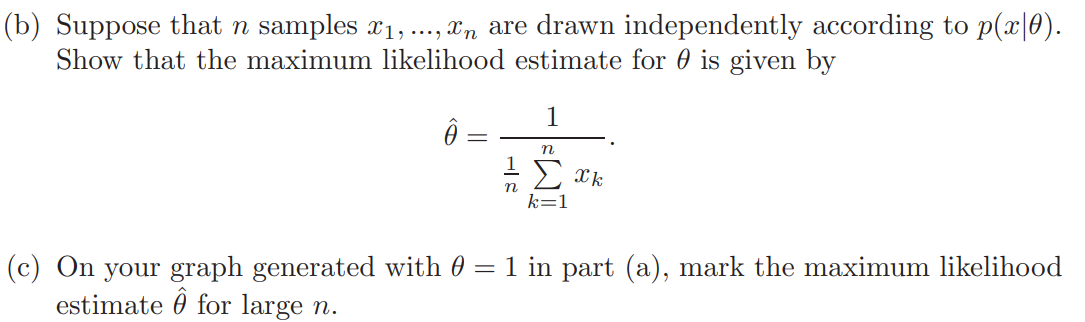

In [1]:
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('pr1.mplstyle')

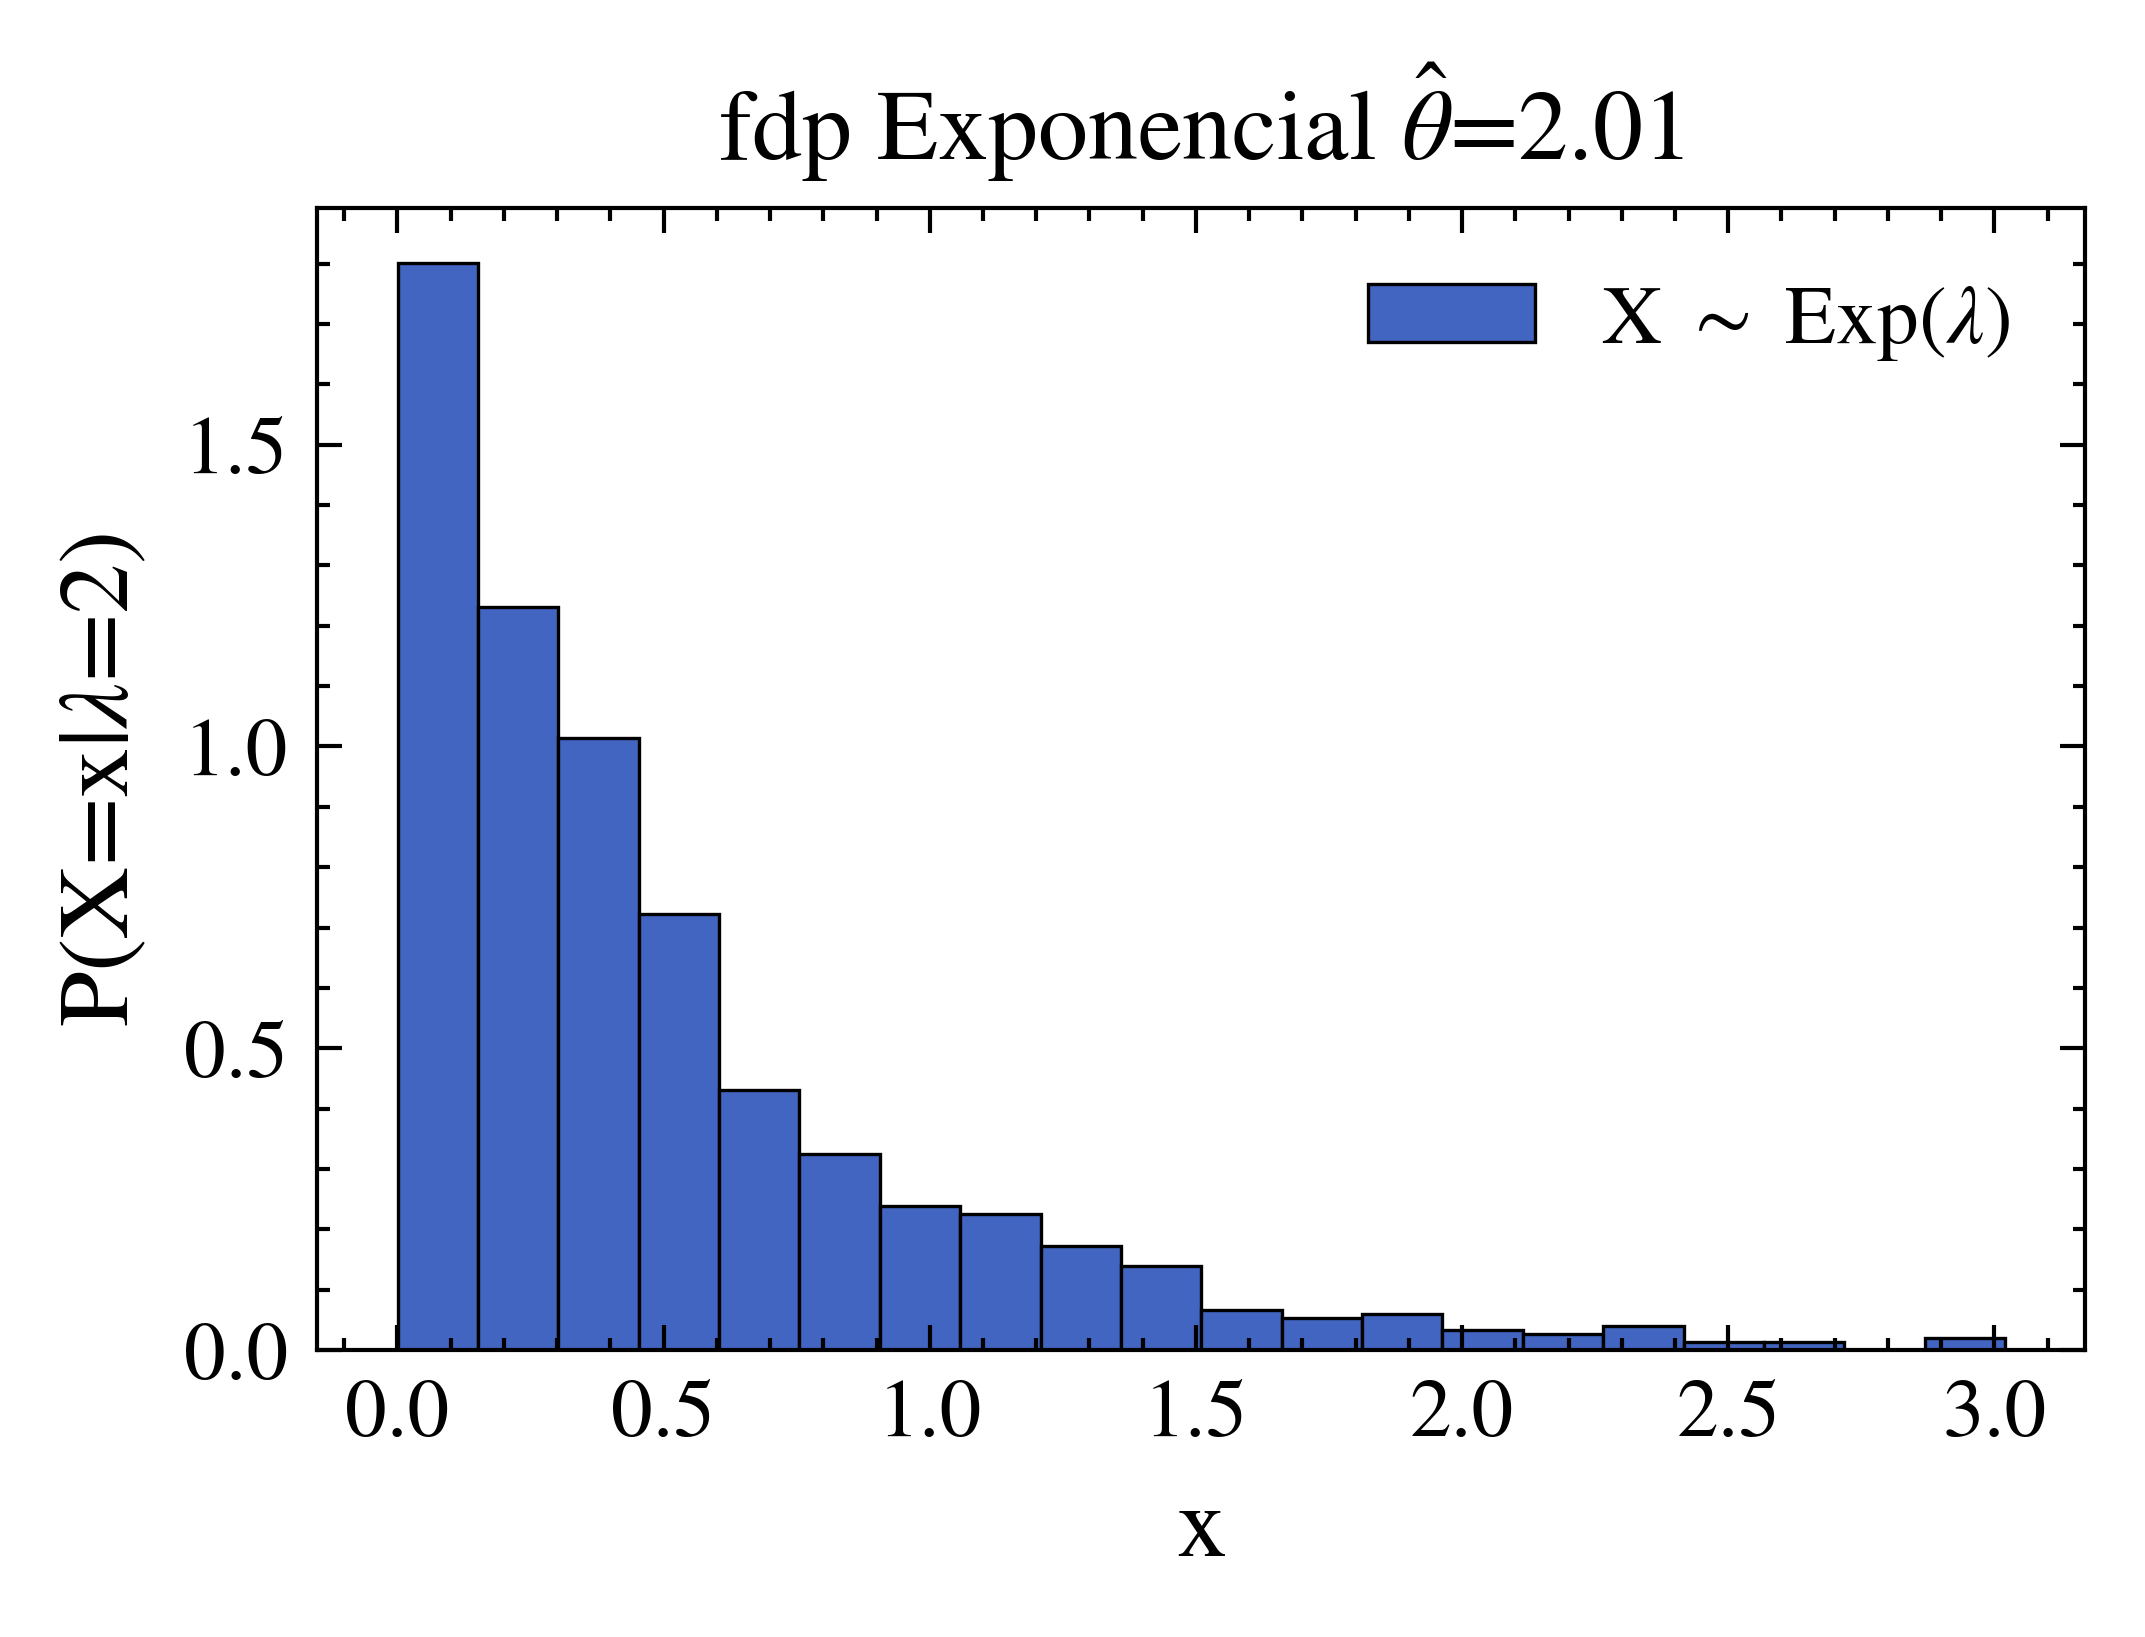

In [2]:
def gen_exp(theta, num):
    z = np.random.uniform(0, 1, num)
    y = -np.log(1-z)/theta
    return y

MLE = lambda x: 1/(np.sum(x)/len(x))

thetaExp = 2
num = 1000
y = gen_exp(thetaExp, num)
plt.hist(y, bins=20, density=True, label = f'X $\sim$ Exp($\lambda$)', edgecolor='black', linewidth=0.4)
plt.xlabel(f'x')
plt.ylabel(f'P(X=x|$\lambda$={thetaExp})')
plt.title(f'fdp Exponencial $\hat{{\\theta}}$={round(MLE(y), 2)}')
#graph a vertical line in the mean
# plt.axvline(x=MLE(y), color='r', linestyle='--', label=f'$\hat{{\\theta}}$={round(MLE(y), 2)}')
plt.legend()

Fijamos $x=2$ y variamos $\theta$, esto es para encontrar el $\hat\theta$ que maximiza el likelihood para una única muestra. Dependiendo el valor de $x$ el likelihood cambia.

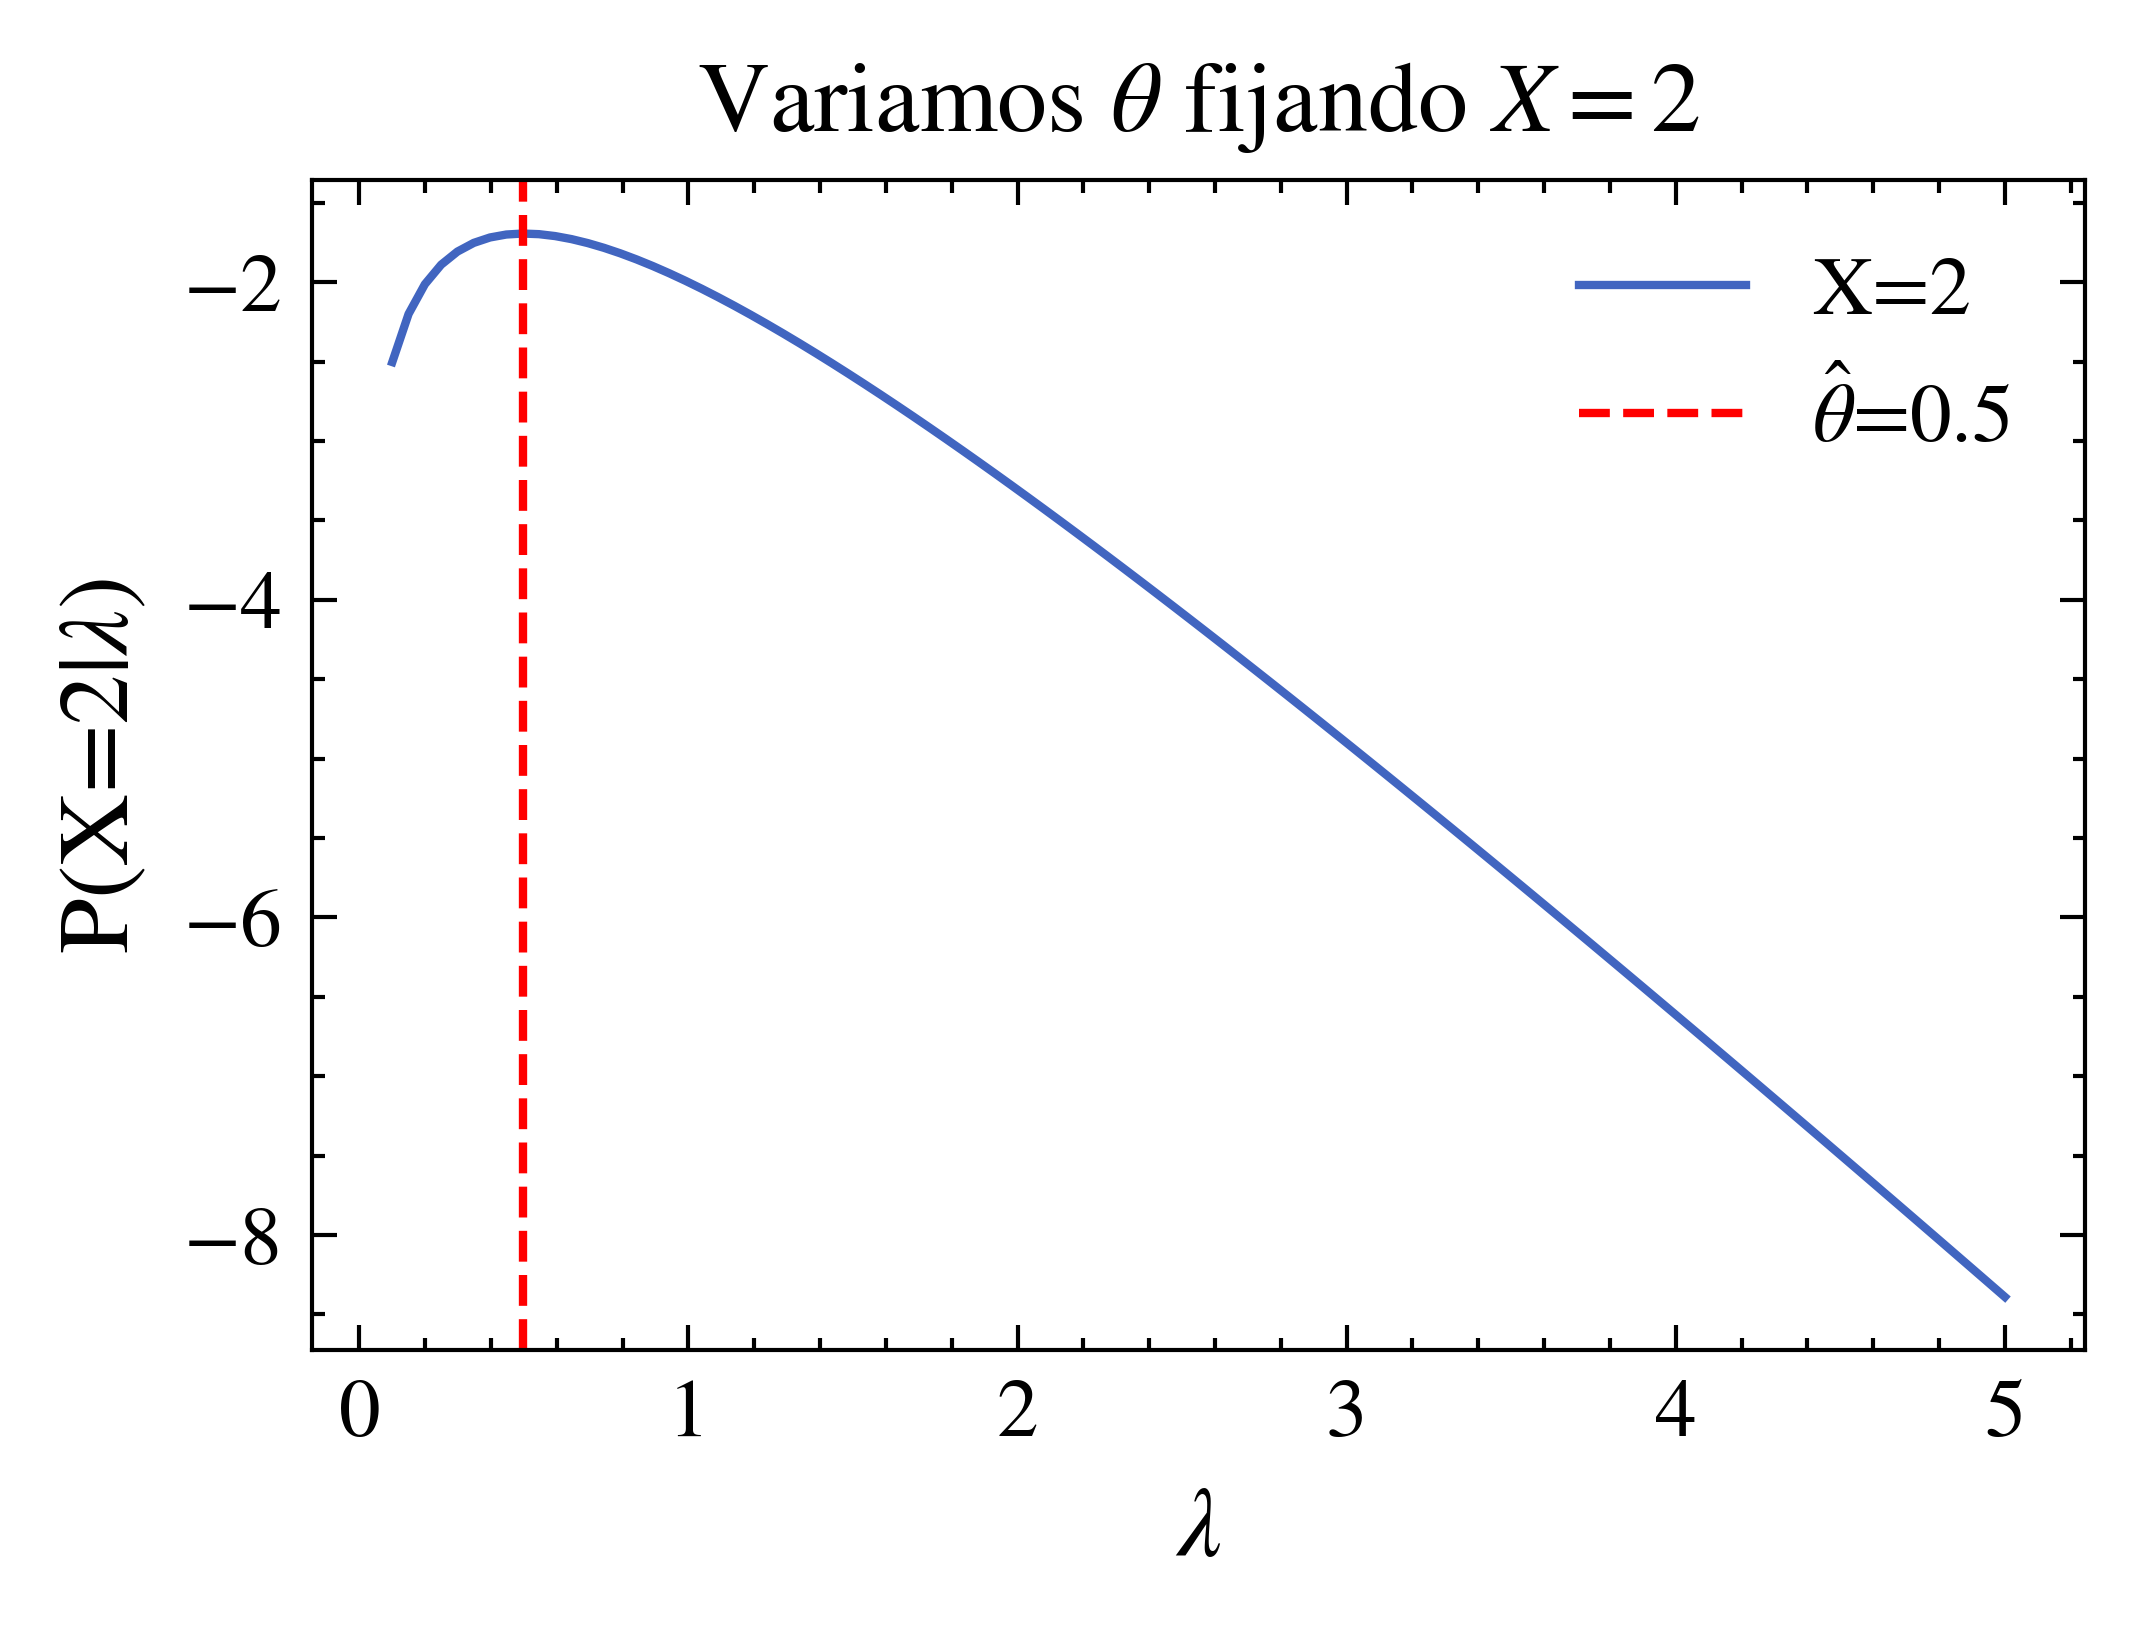

In [3]:
def variate_theta(x, thetas):
    return [theta*np.exp(-theta*x) for theta in thetas]

thetas = np.linspace(0.1, 5, 100)
x = 2
function = variate_theta(x, thetas)
maxima = np.argmax(function)
function = np.log(function)
plt.figure()
plt.plot(thetas, function, label = f'X={x}')
plt.xlabel(f'$\lambda$')
plt.ylabel(f'P(X={x}|$\lambda$)')
plt.title('Variamos $\\theta$ fijando $X=2$')
plt.axvline(x=thetas[maxima], color='r', linestyle='--', label=f'$\hat{{\\theta}}$={round(thetas[maxima], 2)}')
plt.legend()
plt.show()

Calculamos el MLE a partir de ir incrementando el numero de muestras. Queremos ver a que converge

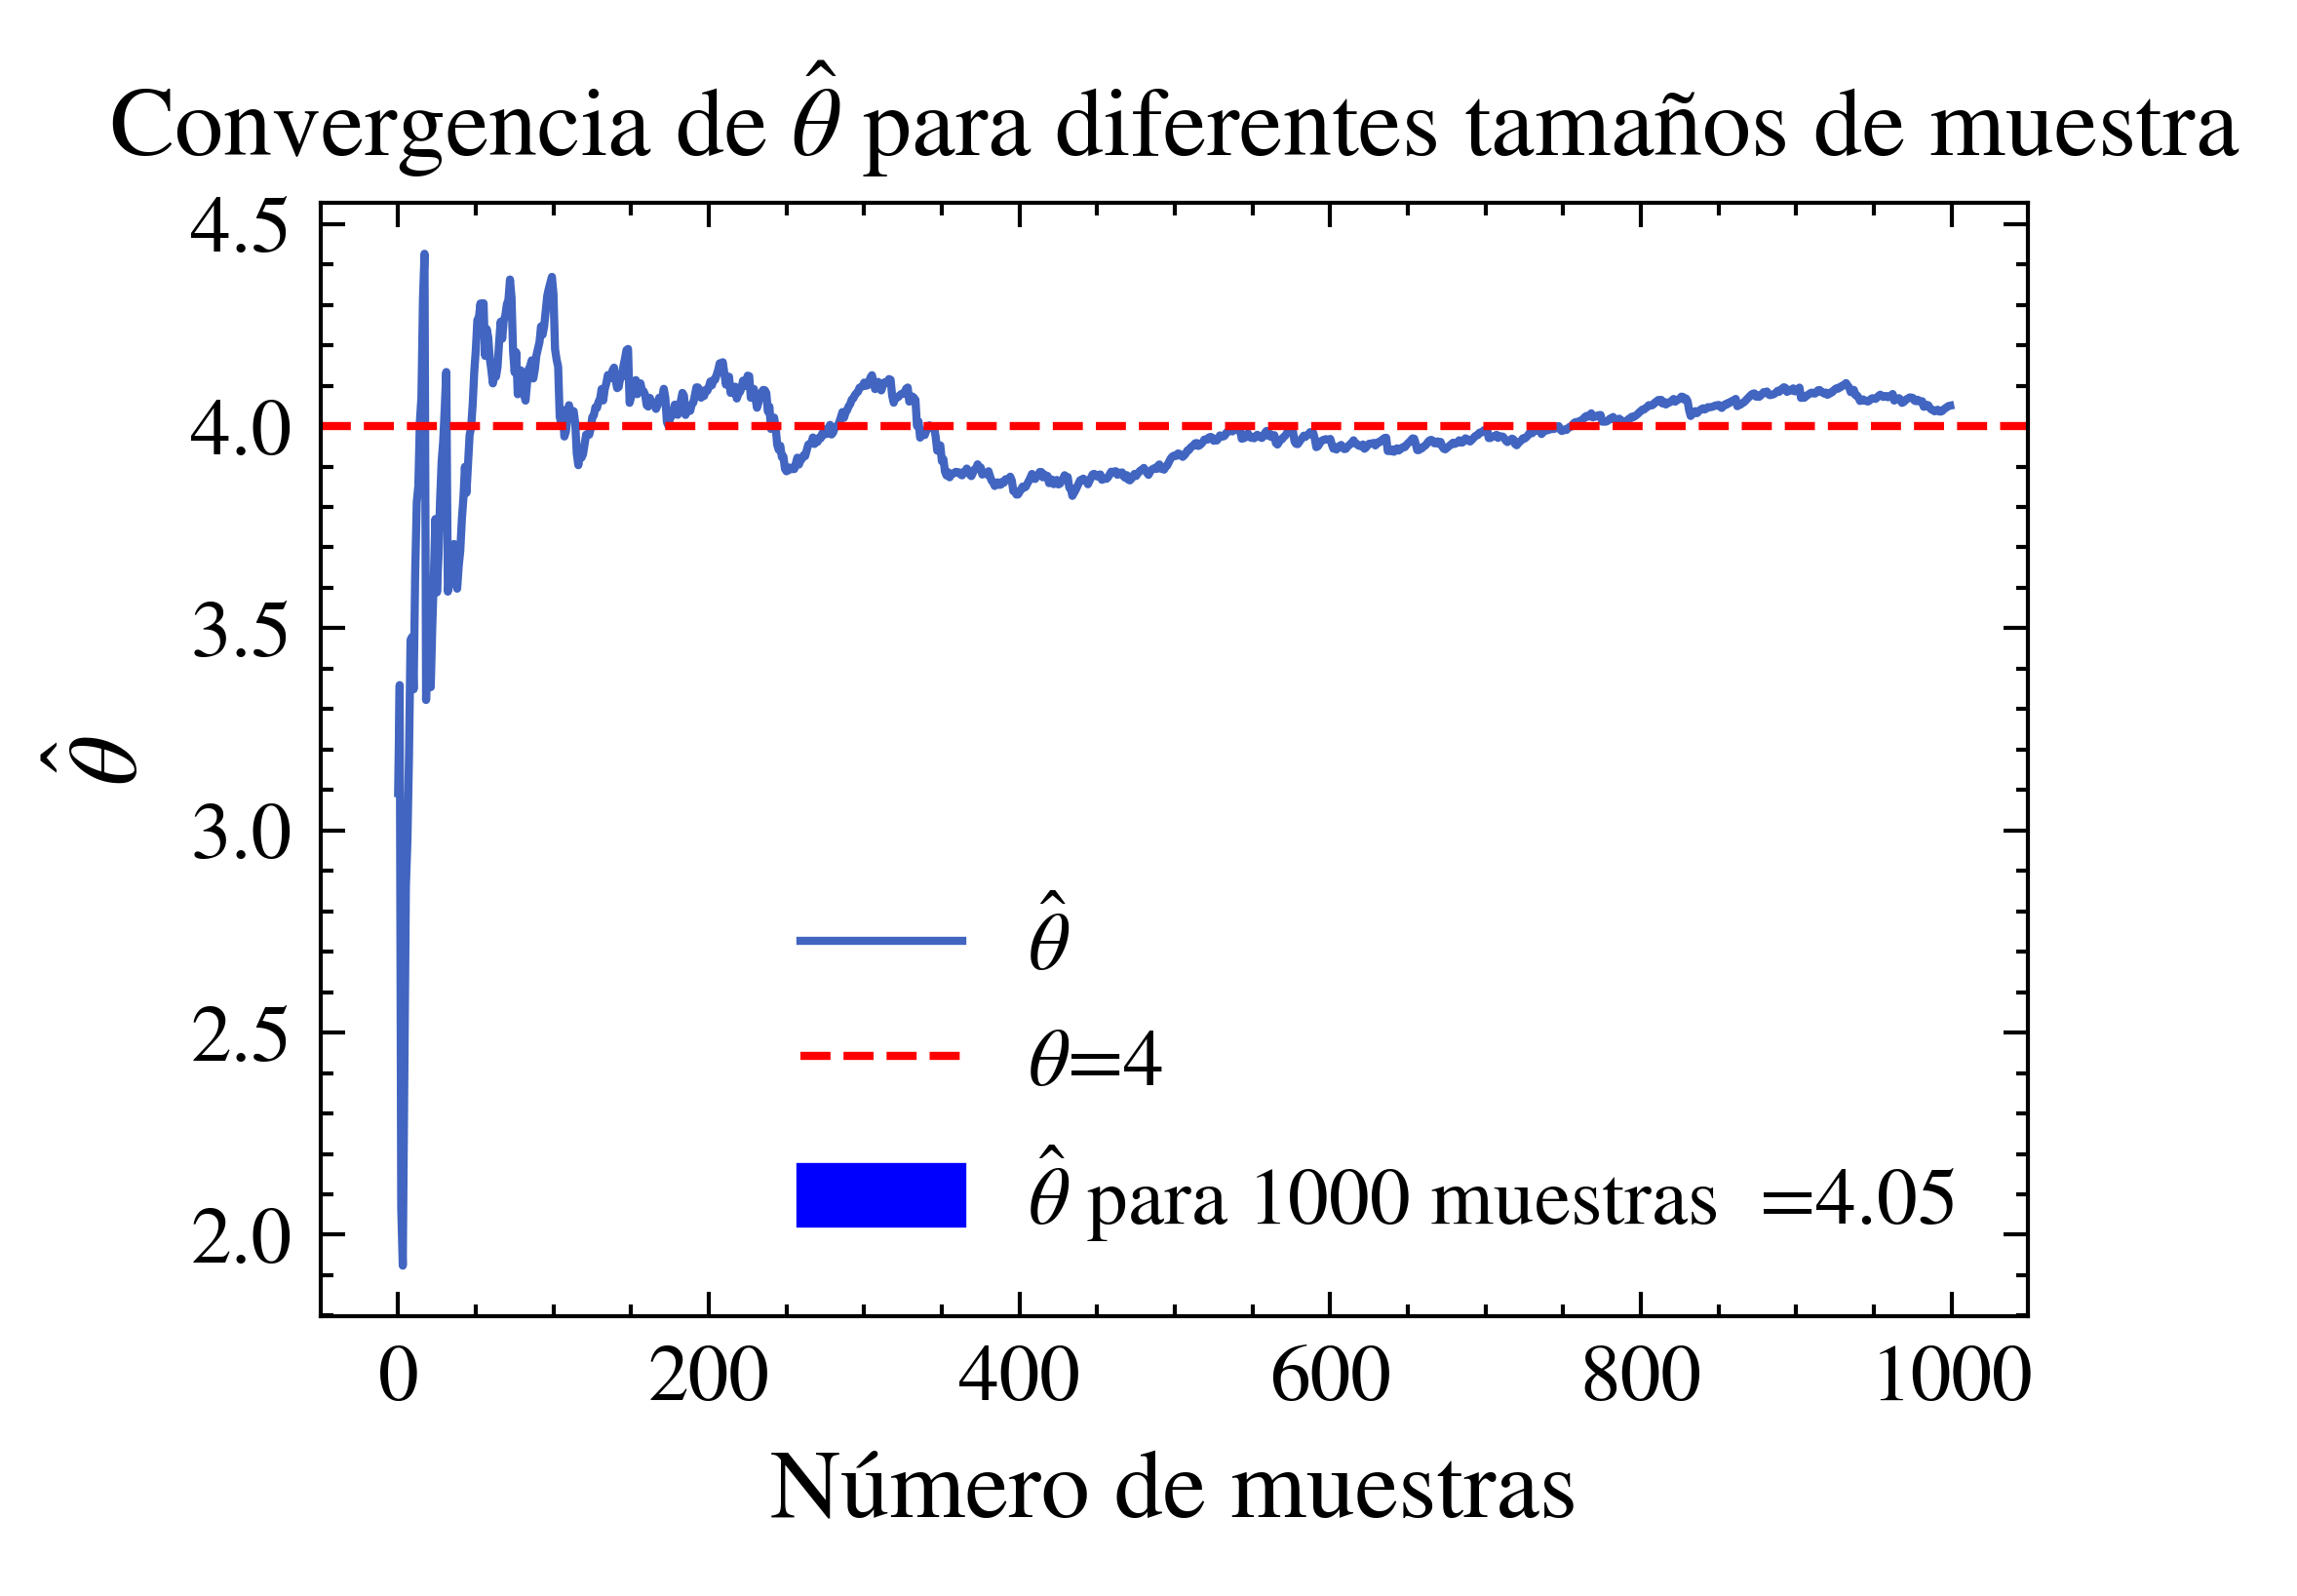

In [4]:
theta = 4
num = 1000
y = gen_exp(theta, num)

subsamples = [MLE(y[:i]) for i in range(1, len(y)+1)]
plt.figure()
plt.plot(subsamples, label = f'$\hat{{\\theta}}$')
plt.xlabel(f'Número de muestras')
plt.ylabel(f'$\hat{{\\theta}}$')
plt.title(f'Convergencia de $\\hat\\theta$ para diferentes tamaños de muestra')
plt.axhline(y=theta, color='r', linestyle='--', label=f'$\\theta$={theta}')
# access legend objects automatically created from data
handles, labels = plt.gca().get_legend_handles_labels()

# create manual symbols for legend
patch = mpatches.Patch(color='blue', label=f'$\\hat\\theta$ para {num} muestras  ={round(subsamples[-1], 2)}')

# add manual symbols to auto legend
handles.extend([patch])

plt.legend(handles=handles)
plt.show()

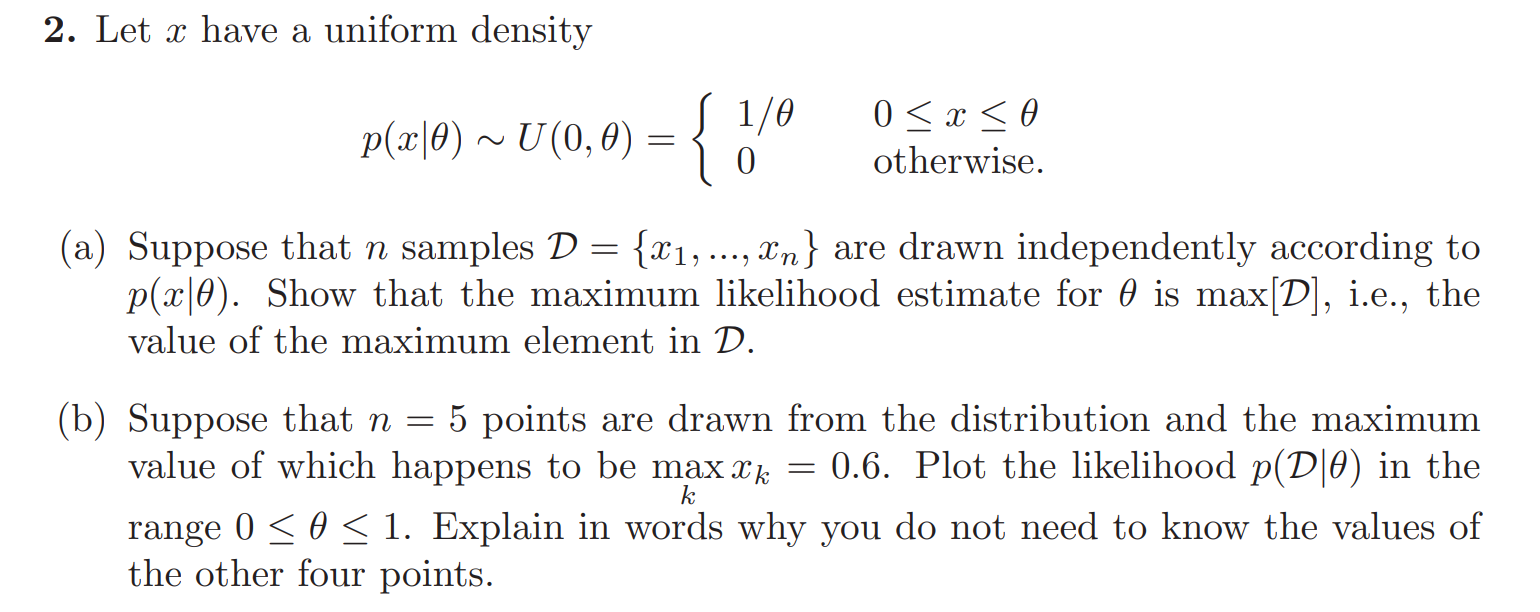

In [5]:
def gen_uniform(a, b, num):
    return np.random.uniform(a, b, num)

theta = 2
num = 1000
y = gen_uniform(0, theta, num)